# Train VAE

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings(action='once')

from functions import vae

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/importlib/_bootstrap_external.py:445: ImportWarning: Not importing directory /home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/google: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/importlib/_bootstrap_external.py:445: ImportWarning: Not importing directory /home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/tensorflow/python/framework/ops.py:923: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is depre

In [2]:
# Create list of base directories

base_dir = os.path.dirname(os.getcwd())

base_dirs = [os.path.join(os.path.dirname(os.getcwd()), "data"),
             os.path.join(os.path.dirname(os.getcwd()), "models"),
             os.path.join(os.path.dirname(os.getcwd()), "output"),
             os.path.join(os.path.dirname(os.getcwd()), "data", "encoded"),
             os.path.join(os.path.dirname(os.getcwd()), "output", "stats"),
             os.path.join(os.path.dirname(os.getcwd()), "output", "viz")
             ]

# Check if analysis directory exist otherwise create

for each_dir in base_dirs:

    if os.path.exists(each_dir):
        print('directory already exists: {}'.format(each_dir))
    else:
        print('creating new directory: {}'.format(each_dir))
    os.makedirs(each_dir, exist_ok=True)

directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/models
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data/encoded
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/stats
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/viz


In [3]:
# Load arguments
normalized_data_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "data",
    "input",
    "train_set_normalized.pcl")

In [4]:
# Read data
normalized_data = pd.read_table(
    normalized_data_file,
    header=0,
    sep='\t',
    index_col=0).T

print(normalized_data.shape)

(950, 5549)


In [5]:
# Parameters 
learning_rate = 0.001
batch_size = 100
epochs = 100
kappa = 0.01
intermediate_dim = 2500
latent_dim = 300
epsilon_std = 1.0
num_PCs = latent_dim
train_architecture = "NN_{}_{}".format(intermediate_dim, latent_dim)

In [6]:
# Create output directories

output_dirs = [os.path.join(os.path.dirname(os.getcwd()), "data", "encoded"),
             os.path.join(os.path.dirname(os.getcwd()), "models"),
             os.path.join(os.path.dirname(os.getcwd()), "output", "stats"),
             os.path.join(os.path.dirname(os.getcwd()), "output", "viz")
             ]

# Check if analysis directory exist otherwise create

for each_dir in output_dirs:
    new_dir = os.path.join(each_dir, train_architecture)
    
    if os.path.exists(new_dir):
        print('directory already exists: {}'.format(new_dir))
    else:
        print('creating new directory: {}'.format(new_dir))
    os.makedirs(new_dir, exist_ok=True)

directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data/encoded/NN_2500_300
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/models/NN_2500_300
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/stats/NN_2500_300
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/viz/NN_2500_300


/home/alexandra/Documents/Repos/Batch_effects_simulation/scripts/functions/vae.py:240: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.
  vae.compile(optimizer=adam, loss=None, loss_weights=[beta])


Train on 855 samples, validate on 95 samples
Epoch 1/100
855/855 [==============================] - 7s 8ms/step - loss: 3614.3398 - val_loss: 3723.7073
Epoch 2/100
855/855 [==============================] - 6s 6ms/step - loss: 3486.4378 - val_loss: 3497.3354
Epoch 3/100
855/855 [==============================] - 6s 6ms/step - loss: 3456.8214 - val_loss: 3469.4744
Epoch 4/100
855/855 [==============================] - 6s 7ms/step - loss: 3434.9976 - val_loss: 3446.7427
Epoch 5/100
855/855 [==============================] - 6s 6ms/step - loss: 3417.7317 - val_loss: 3422.8330
Epoch 6/100
855/855 [==============================] - 6s 6ms/step - loss: 3402.2585 - val_loss: 3394.2639
Epoch 7/100
855/855 [==============================] - 6s 6ms/step - loss: 3390.6060 - val_loss: 3379.5645
Epoch 8/100
855/855 [==============================] - 6s 6ms/step - loss: 3381.4451 - val_loss: 3374.4575
Epoch 9/100
855/855 [==============================] - 6s 6ms/step - loss: 3373.0643 - val_loss: 33

855/855 [==============================] - 6s 6ms/step - loss: 3250.0583 - val_loss: 3261.4373
Epoch 77/100
855/855 [==============================] - 6s 6ms/step - loss: 3249.4037 - val_loss: 3262.8210
Epoch 78/100
855/855 [==============================] - 6s 6ms/step - loss: 3248.8230 - val_loss: 3262.2131
Epoch 79/100
855/855 [==============================] - 5s 6ms/step - loss: 3248.9175 - val_loss: 3262.7148
Epoch 80/100
855/855 [==============================] - 6s 6ms/step - loss: 3248.3439 - val_loss: 3264.5076
Epoch 81/100
855/855 [==============================] - 6s 6ms/step - loss: 3248.1686 - val_loss: 3264.9155
Epoch 82/100
855/855 [==============================] - 6s 6ms/step - loss: 3247.1112 - val_loss: 3261.8513
Epoch 83/100
855/855 [==============================] - 6s 6ms/step - loss: 3247.2821 - val_loss: 3259.3362
Epoch 84/100
855/855 [==============================] - 6s 6ms/step - loss: 3246.5510 - val_loss: 3262.9004
Epoch 85/100
855/855 [===================

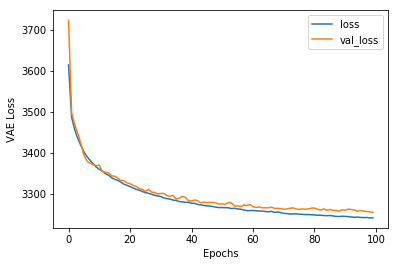

In [7]:
# Train nonlinear (VAE)
vae.tybalt_2layer_model(learning_rate,
                        batch_size,
                        epochs, 
                        kappa, 
                        intermediate_dim,
                        latent_dim, 
                        epsilon_std, 
                        base_dir, 
                        train_architecture 
                        )